# Regression Basics II
Lecture notes by
_Sunil Paul_

- The materials in this notebook is prepared using Angrist and Piscke's "MASTERING METRICS" and " MOSTLY HARMLESS ECONOMETRICS"
- This note explores regression as a conditaional expectation function and this will help ypou to understand the lectures of Prof Angrist that I posted in moodle. I have also uploaded his notes for your reference.
- Please do not quote, I haven't cited all the textbooks I used to prepare. I will upadte the list soon.



## Why do we care about regression?
In economics, we are often interested to learn about differnce in economic outomes. These difference may be characterised by randomness that makes it  hard to explain. Our objective is to summerise and interpret this randomness in a meaningful way. For example, we may be interested in the difference of earnings of peoples with different schooling. This is nothing but expectation of $Y_i$ (earnings or annual income) with $X_i$(Schooling) i.e conditional expectation of $Y_i$ given $X_i$.


### Conditional expectation function 
<span style='color:red'><b>Conditional expectation function </b> </span> for a dependent variable $\text{Y}_{i}$, given a $\text{K}\times 1$ vector of covariates $\text{X}_{i}$, tells us <span style='color:purple'>the expected value (population average) of</span> $\color{#e64173}{\text{Y}_{i}}$ with $\color{#e64173}{\text{X}_{i}}$ held constant. Written as $\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]$, the CEF is a function of $\text{X}_{i}$.<sup>

-  We'll generally assume $\text{X}_{i}$ is a random variable, which implies that $\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]$ is also a random variable.
- We are focusing on the __population__. We want to build our intuition about the parameters that we will eventually estimate.


Formally, for continuous $\text{Y}_{i}$ with conditional density $f_y(t|\text{X}_{i}=x)$ at $Y_i=y$,
$$
  \mathop{E}\left[ {Y}_{i}\mid {X}_{i} = x \right] = \int y f_y(y|{X}_{i}=x)dy
$$
and for discrete ${Y}_{i}$ with conditional p.m.f. $\mathop{{Pr}}\left({Y}_{i}=y|{X}_{i}=x\right)$,
    

$$
\mathop{E}\left[ {Y}_{i}\mid {X}_{i}=x \right] = \sum_y y \mathop{{Pr}}( {Y}_{i}=y|{X}_{i}=x)$$

Let us now look into some of the properties(without detailed proofs).

Devivation of some of these propoerties  rely upon *the Law of Iterated Expectations* (LIE).
(Hope you have learned this in your statistics course)
$$
\begin{align}
  {\mathop{E}\left[ \text{Y}_{i} \right]} = \mathop{E}\!\bigg( {\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]} \bigg)
\end{align}
$$
which says that the __unconditional expectation__
is equal to the __unconditional average__ of the __conditional expectation function__.

#### The CEF decomposition property 

The LIE allows us to **decompose random variables** into two pieces


$$
\begin{align}
  \text{Y}_{i} = {\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]} + {\varepsilon_i}
\end{align}
$$

1. the conditional expectation function
2. a residual  with special powers.
<br> i.  $\color{#6A5ACD}{\varepsilon_i}$ is mean independent of $\text{X}_{i}$, _i.e._, $\mathop{E}\left[ {\varepsilon_i} \mid \text{X}_{i} \right] = 0$.
<br> ii.  ${\varepsilon_i}$ is uncorrelated with any function of $\text{X}_{i}$.


The CEF decomposition property says that we can decompose any random variable (_e.g._, $\text{Y}_{i}$) into
1. a part that is _explained by_ ${\text{X}_{i}}$ (_i.e._, the CEF ${\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]}$),
2. a part that is *orthogonal to* (uncorrelated with) any function of ${\text{X}_{i}}$ (_i.e._, ${\varepsilon_i}$).

- CEF  also presents an intuitive summary of the relationship between $\text{Y}_{i}$ and $\text{X}_{i}$, since we are often use means to characterize random variables.

#### The CEF prediction property

Let $\mathop{m}\left( \text{X}_{i} \right)$ be *any* function of $\text{X}_{i}$. The CEF solves
$$
\begin{align}
  {\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} = \underset{\mathop{m}\left( \text{X}_{i} \right)}{\text{arg min}}\enspace \mathop{E}\left[ \left( \text{Y}_{i} - \mathop{m}\left( \text{X}_{i} \right) \right)^2 \right]
\end{align}
$$
We can prove that $\mathop{E}\left[ \left( \text{Y}_{i} - \mathop{m}\left( \text{X}_{i} \right) \right)^2 \right]$ when $\mathop{m}\left( \text{X}_{i} \right)=E[Y_i|X_i]$

In other words, the __CEF__ is the minimum mean-squared error (MMSE) predictor of $\text{Y}_{i}$ given $\text{X}_{i}$.

####  The ANOVA theorem 
$$
\begin{align}
  \mathop{\text{Var}} \left( \text{Y}_{i} \right) = \mathop{\text{Var}} \left( {\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \right) + \mathop{E}\left[ \mathop{\text{Var}} \left( \text{Y}_{i} \mid \text{X}_{i} \right) \right]
\end{align}
$$
which says that we can decompose the variance in $\text{Y}_{i}$ into
1. the variance in the __CEF__
2. the variance of the residual

*Example:* Decomposing wage variation into (1) variation explained by workers' characteristics and (2) unexplained (residual) variation


---
Graphically we can represent _CEF_ as follows:

In [2]:
library(extrafont)
loadfonts(device = "win")

library(ggplot2)
library(dplyr)
library(ggridges)
library(viridis)
library(ggthemes)

# Set seed
set.seed(12345)
# Sample size
n <- 1e4
# Generate extra disturbances
u <- sample(-2:2, size = 22, replace = T) * 1e3
# Generate data
cef_df <- tibble(
  x = sample(x = seq(8, 22, 1), size = n, replace = T),
  y = 15000 + 3000 * x  + 1e3 * (x %% 3) + 500 * (x %% 2) + rnorm(n, sd = 1e4) + u[x]
) %>% mutate(x = round(x)) %>%
filter(y > 0)
# Means
means_df <- cef_df %>% group_by(x) %>% summarize(y = mean(y))
# The CEF in ggplot
gg_cef <- ggplot(data = cef_df, aes(x = y, y = x %>% as.factor())) +
  geom_density_ridges_gradient(
    aes(fill = ..x..),
    rel_min_height = 0.003,
    color = "white",
    scale = 2.5,
    size = 0.3
  ) +
  scale_x_continuous("Annual income") +
  ylab("Years of education") +
  scale_fill_viridis(option = "magma") +
  theme_pander(base_family = 'Times New Roman', base_size = 18) +
  theme( legend.position = "none"
  ) +
  coord_flip()


Picking joint bandwidth of 2410

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.g

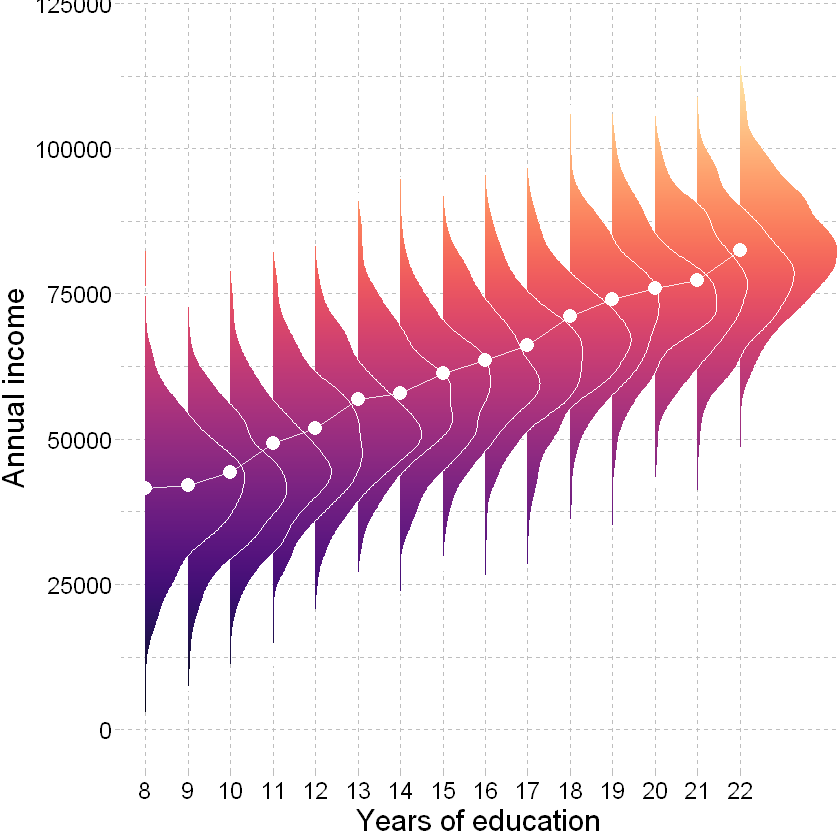

In [5]:
gg_cef +
  geom_path(
    data = means_df,
    aes(x = y, y = x %>% as.factor(), group = 1),
    color = "white",
    alpha = 0.85
  ) +
  geom_point(
    data = means_df,
    aes(x = y, y = x %>% as.factor()),
    color = "white",
    shape = 16,
    size = 3.5
  )

__The CEF, $\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]$, connects these conditional distributions' means.__

In [5]:
rgcef <- ggplot(data = cef_df, aes(x = y, y = x %>% as.factor())) +
  geom_density_ridges(
    rel_min_height = 0.003,
    color = "grey85",
    fill = NA,
    scale = 2.5,
    size = 0.3
  ) +
  scale_x_continuous(
    "Annual income",
    labels = scales::dollar
  ) +
  ylab("Years of education") +
  scale_fill_viridis(option = "magma") +
  theme_pander(base_family = "Fira Sans Book", base_size = 18) +
  theme(
    legend.position = "none"
  ) +
  geom_path(
    data = means_df,
    aes(x = y, y = x %>% as.factor(), group = 1),
    color = "grey20",
    alpha = 0.85
  ) +
  geom_point(
    data = means_df,
    aes(x = y, y = x %>% as.factor()),
    color = "grey20",
    shape = 16,
    size = 3.5
  ) +
  coord_flip()

Picking joint bandwidth of 2410

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label)

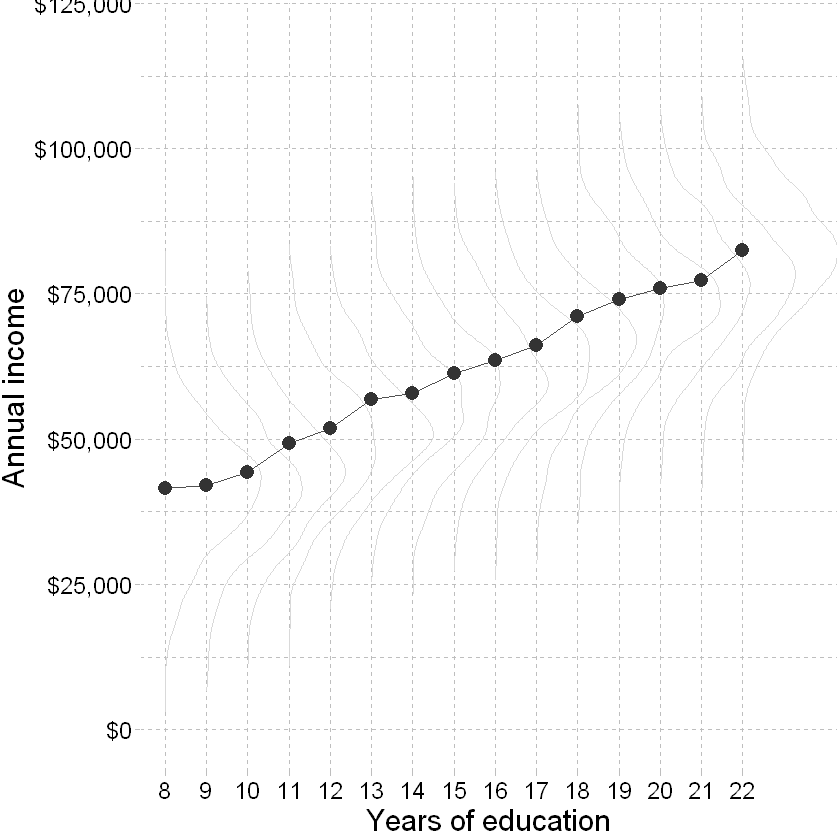

In [6]:
rgcef 

Many of the CEFs we are interested may involve more than one conditioning variable each of which may take two or more values as follws:
$$E[Y_i|X_{1i},...,X_{ki}]$$


### The *CEF* and regression

(I am omitting the detailed proofs in this section. But if you are interested to learn more please see Chapter 3 of Mostly harmless econometrics)

Earlier we have derived $\beta_i$s by $\min_{\beta}((Y-X\beta)'(Y-X\beta))$
 while discussing regression as curve fitting ptoblem  i.e
 $${\hat{\beta}_{LS}=(X}^{\prime }{X)}^{-1}{X}^{\prime }{y}$$. 
 
Remember,we can also define the population least square parameters as follows:
 $$
\begin{align}
  \beta = \underset{b}{\text{arg min}}\thinspace \mathop{E}\left[ \left( \text{Y}_{i} - \text{X}_{i}'b \right)^2 \right]
\end{align}
$$
where $b$ and $\text{X}_{i}$ are also $k\times 1$, and $\text{Y}_{i}$ is a scalar 


Taking the first-order condition gives
$$
\begin{align}
   \mathop{E}\left[ \text{X}_{i} \left( \text{Y}_{i} - \text{X}_{i}'b \right) \right] = 0
\end{align}
 $$
 
 and as we have defined $\beta$ as the optimum, sloving for b we get
 
  $${\beta}=(E[{X}^{\prime }{X}])^{-1}E[{X}^{\prime }{y}]$$
  where $E[.]$ is the expectation operator.
  Note that $\beta$s are not estimators. These coeffcients are features of the joint distribution of dependent and independent variables.
  Hence  we would be interested in regression coefficinets if we interested in CEF. Why
  Angrist and Pischke give three regression justifications. They are:
  1. *If the CEF is linear*, then the population regression line is the CEF.

2. The function $\text{X}_{i}' \beta$ is the min. MSE *linear* predictor of $\text{Y}_{i}$ given $\text{X}_{i}$.

3. The function $\text{X}_{i}' \beta$ gives the min. MSE *linear* approximation to the CEF.

#### Regression Justification I: The Linear CEF Theorem.
If $E[Y_i|X_{1i},...,X_{ki}=\beta_0+\sum_{k=1}^K\beta_kX_{ki}$  for some constants $\beta_i; i=0,1,...K$, then  the regression of $Y_i$ on $X_{1i},..., X_{ki}$ has intercept $\beta_0$ and slopes $\beta_1,...,\beta_k$. If the CEF is linear, then the population regression line is the CEF.

__Proof__ Let the CEF equal some linear function, _i.e._, $\color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} = \text{X}_{i}' \beta^\star$.

From the CEF decomposition property, we know $\mathop{E}\left[ \text{X}_{i} \color{#6A5ACD}{\varepsilon_i} \right] = 0$.


$\implies \mathop{E}\left[ \text{X}_{i} \left( \text{Y}_{i} - \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \right) \right] = 0$


$\implies \mathop{E}\left[ \text{X}_{i} \left( \text{Y}_{i} - \text{X}_{i}'\beta^\star \right) \right] = 0$


$\implies \mathop{E}\left[ \text{X}_{i}\text{Y}_{i} \right] - \mathop{E}\left[ \text{X}_{i} \text{X}_{i}' \beta^\star \right] = 0$


$\implies \beta^\star = \mathop{E}\left[ \text{X}_{i} \text{X}_{i}' \right]^{-1} \mathop{E}\left[ \text{X}_{i}\text{Y}_{i} \right]$
 $=\beta$, our population regression coefficients.

Hence, if you are interested in the CEF; andyou have reason to believe the CEF is linear, then you regression is an appropriate method for estimating your object of interest. Of course, the CEF may not be linear. In such cases, we need a different justification for using regression.

 #### Regression Justification II: The best linear predictor theorem.


The regression function ($X_i^{\prime}\beta$ ) is the best linear predictor of $Y_i$ given $X_i$; in a MMSE sense (i.e. no other vector of coefficients can generate a lower mean squared error than the regression coefficient vector $\beta$ , in the class of linear functions)

__Proof__: We defined $\beta$ as the vector that minimizes MSE, _i.e._,
$$
\begin{align}
  \beta = \underset{b}{\text{arg min}}\thinspace \mathop{E}\left[ \left( \text{Y}_{i} - \text{X}_{i}'b \right)^2 \right]
\end{align}
$$
so $\text{X}_{i}'\beta$ is literally defined as the minimum MSE linear predictor of $\text{Y}_{i}$.


- The population-regression function $\left(\text{X}_{i}'\beta\right)$ is the best (min. MSE) *linear* predictor of $\text{Y}_{i}$ given $\text{X}_{i}$.
- The CEF $\left( \mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right] \right)$ is the best predictor (min. MSE) of $\text{Y}_{i}$ given $\text{X}_{i}$ across *all classes* of functions.


 
 #### Regression Justification III: The Linear Approximation Theorem.
 If $E[Y_i|X_{1i},...,X_{ki}$ is a nonlinear function of the conditioning variables then, the regression of $Y_i$ on $X_{1i},..., X_{ki}$ gives best linear approximation  to the nonlinear CEF in the sense of minimising the expected squared devioation between the fitted values from a linear model and the CEF.i.e
 
 The population regression function $\text{X}_{i}'\beta$ provides the minimum MSE linear approximation to the CEF $\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]$, _i.e._,
$$
\begin{align}
  \beta = \underset{b}{\text{arg min}}\thinspace \mathop{E}\!\left\{ \bigg( \mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right] - \text{X}_{i}'b \bigg)^2 \right\}
\end{align}
$$
 

__Proof__ First, recall that, in expectation, $\beta$ is the $b$ that minimizes $\left( \text{Y}_{i} - \text{X}_{i}'b \right)^2$


Adding  and subscracting$\color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]}$ we get 

$\left( \text{Y}_{i} - \text{X}_{i}'b \right)^2 \color{#ffffff}{\bigg|}= \bigg( \left\{ \text{Y}_{i} - \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \right\} + \left\{ \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} - \text{X}_{i}'b \right\} \bigg)^2$
<br>  $= \bigg( \text{Y}_{i} - \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \bigg)^2$ 
<br>  $\color{#ffffff}{=}+\bigg( \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} - \text{X}_{i}'b \bigg)^2$ 
<br>  $\color{#ffffff}{=}+ 2 \bigg( \text{Y}_{i} - \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \bigg) \bigg( \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} - \text{X}_{i}'b \bigg)$

Once we take expectations on both sides, the last line disappears (expectation zero). Note that the first term does not involve b. Hence, since $\beta$ minimizes $E(Y_i-  X_i^{\prime}b)^2$, it must be true that $\beta$ minimizes
$( \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} - \text{X}_{i}'b )^2$ as well (expectations operator applied to the penultimate line). And that’s what
we were supposed to prove.

let us now use the CEF that we plotted to show this in graph

In [12]:
# Estimate the relationship
cef_lm <- lm(y ~ x, data = cef_df)
# Find the regression points
lm_df <- tibble(
  x = 8:22,
  y = predict(object = cef_lm, newdata = data.frame(x = 8:22))
)
# Create the figure
gg_cef <- ggplot(data = cef_df, aes(x = y, y = x %>% as.factor())) +
  geom_density_ridges(
    rel_min_height = 0.003,
    color = "grey85",
    fill = NA,
    scale = 2.5,
    size = 0.3
  ) +
  scale_x_continuous(
    "Annual income",
    labels = scales::dollar
  ) +
  ylab("Years of education") +
  scale_fill_viridis(option = "magma") +
  theme_pander(base_family = "Fira Sans Book", base_size = 18) +
  theme(
    legend.position = "none"
  ) +
  geom_path(
    data = means_df,
    aes(x = y, y = x %>% as.factor(), group = 1),
    color = "grey20",
    alpha = 0.85
  ) +
  geom_point(
    data = means_df,
    aes(x = y, y = x %>% as.factor()),
    color = "grey20",
    shape = 16,
    size = 3.5
  ) +
  coord_flip()


Picking joint bandwidth of 2410

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.g

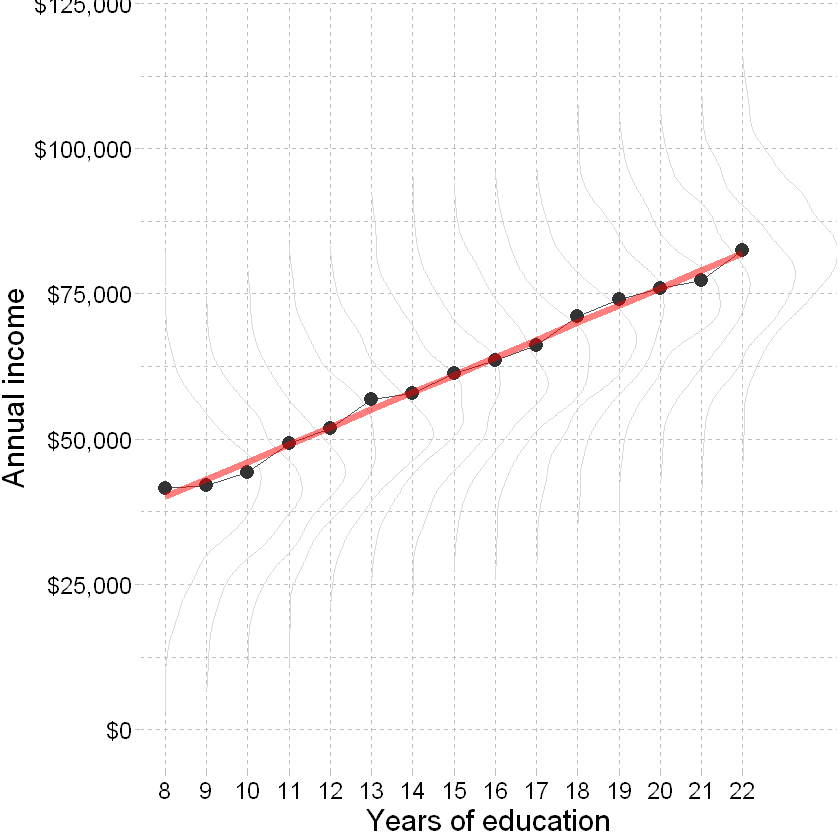

In [13]:
gg_cef +
  geom_path(
    data = lm_df,
    aes(x = y, y = x %>% as.factor(), group = 1),
    color = "red",
    alpha = 0.5,
    size = 2
  )

In summary, The object of interest in most empirical studies is the CEF, and regression is a very useful tool for shedding light on
it.

### Ordinary Least Squares(OLS) and its properties
 We have already discussed the derivation of $\hat{\beta}$ vector using sample in RegBasics_I. Traditionally these estimates are known as OLS estimators and are derived by $$\min_{\beta}((y-X\beta)'(y-X\beta))$$  and 
__Under the Ideal Conditions__  $\beta_{LS}$ is consistent and asymptotically normally distributed with covariance matrix V,

$$\hat{\beta}_{LS}\stackrel{a}{\sim} N(\beta,V)$$ In other words The OLs estimators have the following properties:
1. OLS estimators are linear
2. Unbiased i.e $E[\hat{\beta}]=\beta$
3. Efficient:OLS estimators are the most efficient among all unbiased linear estimators.They will have minimum variance
4. Consistant: As the sample becomes infinitely large the parameter estimate given by a procedure such as OLS converges on the true parameter value.
We won't discussiing this in details but there will be a problem in assignment related to these properties.
 